In [10]:
from sklearn.datasets import make_regression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

### Linear Regression

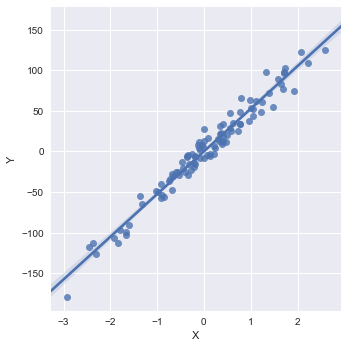

In [25]:
sns.set()

# coef参数为True时，会返回coefficient回归系数，也就是这里的W_target
x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, coef=True)

# numpy.flatten()会将多维数组降至一维，返回一份拷贝，对拷贝所做的修改不会影响原始矩阵
# numpy.ravel()会将多维数组降至一维，且会影响原始矩阵
df = pd.DataFrame(data={'X': x_train.flatten(), 'Y': y_train.flatten()})

sns.lmplot(x='X', y='Y', data=df, fit_reg=True)

In [52]:
# 使用torch.tensor直接将list转化为tensor
# 如果需要，通过将requires_grad参数设置为True
x_torch = torch.tensor(x_train, dtype=torch.float32)
y_torch = torch.tensor(y_train, dtype=torch.float32)
y_torch = y_torch.view(y_torch.size()[0], 1)

In [53]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.linear(x)

model = LinearRegression(1, 1)

In [61]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(50):
    # 为什么这里不需要requires_grad为True的Tensor？是因为没搭建NN吗？
    output = model(x_torch)
    loss = loss_func(output, y_torch)
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
predicted = model(x_torch).data.numpy()

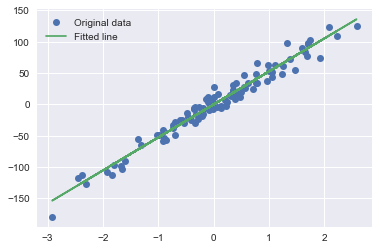

In [62]:
plt.plot(x_train, y_train, 'o', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()